## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, 
                            cohen_kappa_score, roc_auc_score, roc_curve)
import pickle

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
data = pd.read_csv('Healthcare_dataset.csv')

In [3]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
data.set_index('Ptid', inplace = True)

In [5]:
data

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1


**The dataset contains patient level information used to determine if a patient continues (is persistent) with a prescribed drug treatment overtime**

In [6]:
print(f' Data : rows {data.shape[0]}, columns {data.shape[1]}')

 Data : rows 3424, columns 68


**Data has 3424 rows and 68 columns**

## Data Exploration 

### Visualization

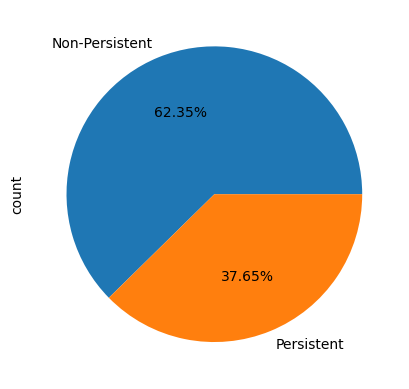

In [7]:
# Let's explore the count of patient's who are persistent and not persistent

data['Persistency_Flag'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

**Inference**

*62.35% patients are not persistent to the drugs whereas 37.65% patients are persistent to drugs*

### Univariate Analysis

In [8]:
data.columns

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Pers

In [9]:
num_cols = ['Dexa_Freq_During_Rx']

In [10]:
cat_cols = ['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 
            'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
           'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 
            'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 
            'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 
            'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 
            'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 
           'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 
            'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 
            'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 
            'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm',
           'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
           'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers',
           'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 
            'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 
            'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 
            'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 
           'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 
           'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 
            'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 
            'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 'Risk_Recurring_Falls', 
            'Count_Of_Risks']

In [11]:
data['Persistency_Flag'].value_counts(normalize=True)

Persistency_Flag
Non-Persistent    0.62354
Persistent        0.37646
Name: proportion, dtype: float64

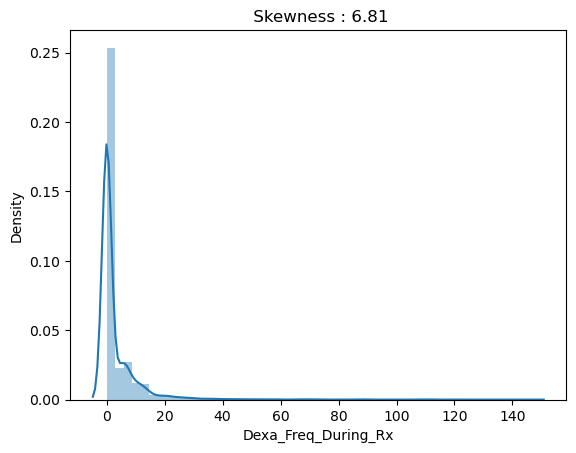

In [12]:
for i in num_cols:
    sns.distplot(data[i])
    plt.title(f' Skewness : {round(data[i].skew(),2)}')
    plt.show()

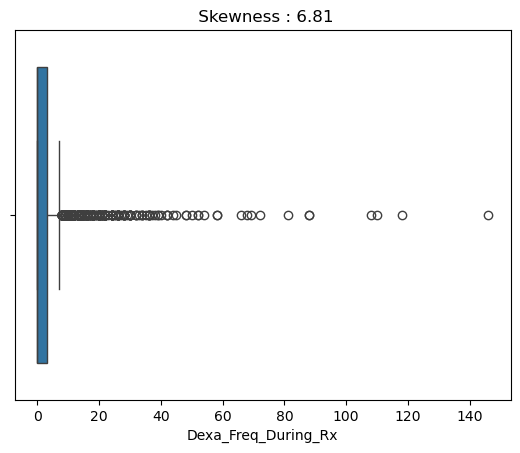

In [13]:
for i in num_cols:
    sns.boxplot(data[i], orient='h')
    plt.title(f' Skewness : {round(data[i].skew(),2)}')
    plt.show()

**Inference**

* The numerical column is highly positively skewed and the boxplot shows that it can be because of the extreme outliers present on the upper tail of the data

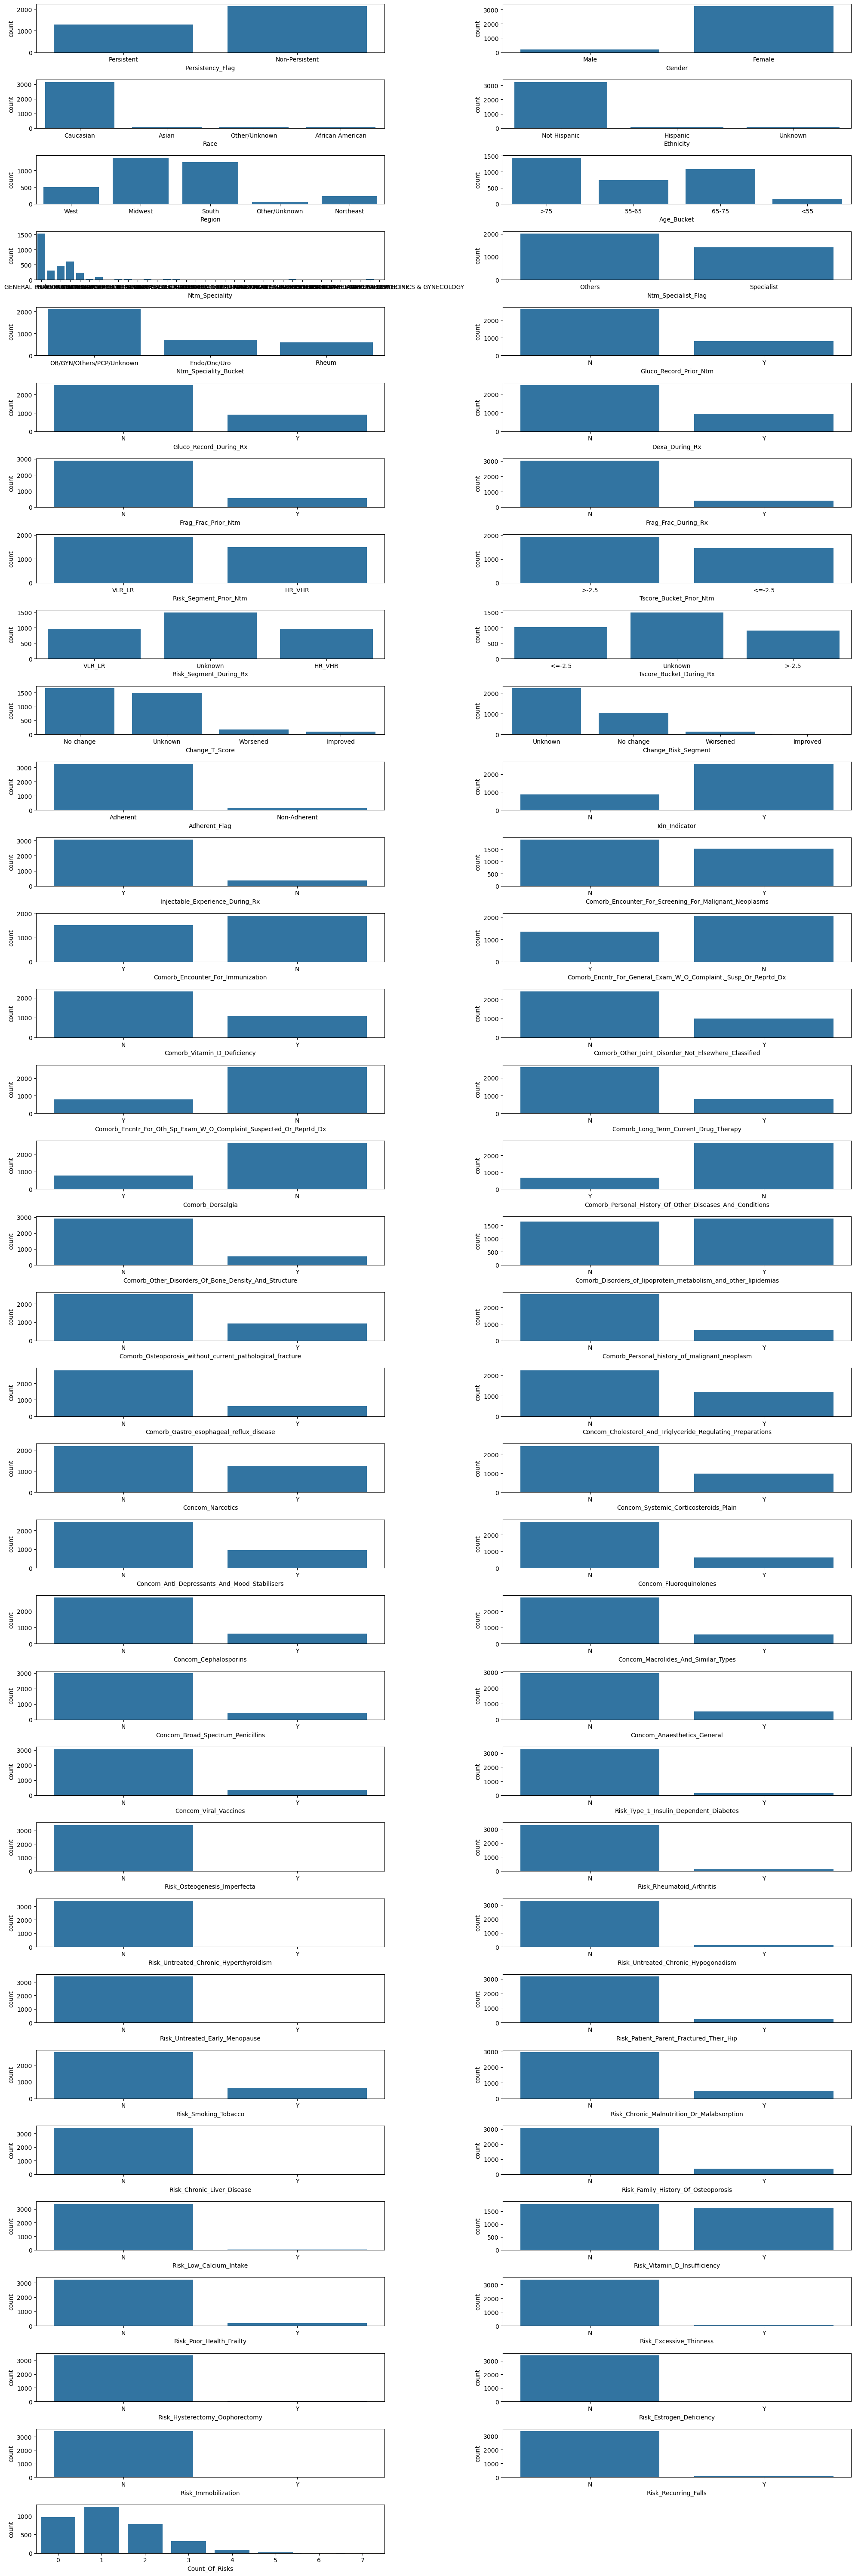

In [14]:
t = 1
plt.figure(figsize=(20,60))
for i in cat_cols:
    plt.subplot(34,2,t)
    sns.countplot(data = data, x=i)
    t = t+1
plt.tight_layout()
plt.show()

**Inference**

* Most patients are not persistent with the drug, as shown in the pie chart above.

* The female ratio is significantly higher than male.

* Most patients belong to the Caucasian race.

* The majority of patients are non-Hispanic and reside in the Midwest region.

* The age distribution shows that most patients belong to the >75 age group.

* Most NTM_Specialty entries are General Physician, and NTM_Specialist_Flag is mostly categorized as 'Others'.

* The NTM_Specialty_Bucket is dominated by OB/GYN, Others, PCP, Unknown categories.

* Most patients have no Glucocorticoid usage either prior to or during therapy.

* The majority of patients did not undergo a Dexa scan during therapy.

* Most patients did not have fragility fractures prior to NTM or during therapy.

* Most patients belonged to the VLR_LR risk segment before NTM, followed by some in the HR_VHR category.

* Most patients had a T-score greater than -2.5 before NTM, and the rest had a score less than or equal to -2.5.

* During therapy, most patients fall under the 'Unknown' category for both risk segment and T-score bucket.

* For the change in T-score before and after therapy, most patients showed no change, while others were in the 'Unknown', 'Worsened', or 'Improved' categories.

* Similarly, for changes in risk segment, most patients fall under the 'Unknown' category. Some showed no change, a few worsened, and very few improved.

* Most patients were adherent to the therapies, though some were non-adherent.

* Most patients were mapped to IDN, while some were not.

* A majority of patients had experience with injectable drugs prior to NTM Rx.

* Most patients did not have conditions such as malignant neoplasms, immunizations, vitamin D deficiency, other joint disorders, long-term drug therapy, comorbidity dorsalgia, or gastroesophageal reflux disease.

* Most patients had no concomitant use of cholesterol/triglyceride regulators, narcotics, corticosteroids, antidepressants, fluoroquinolones, cephalosporins, macrolides, penicillins, anesthetics, or vaccines.

* Most patients did not have any recorded risk of type 1 diabetes, osteogenesis imperfecta, rheumatoid arthritis, untreated chronic hyperthyroidism, untreated hypogonadism, early menopause, fractured hips, smoking, chronic malnutrition or malabsorption, chronic liver disease, family history of osteoporosis, low calcium intake, frailty, thinness, hysterectomy or oophorectomy, estrogen deficiency, immobilization, or recurring falls.

* Most patients had a risk count of '1', followed by '0', then '2', '3', '4', and so on.



### Bivariate Analysis

**Num vs cat**

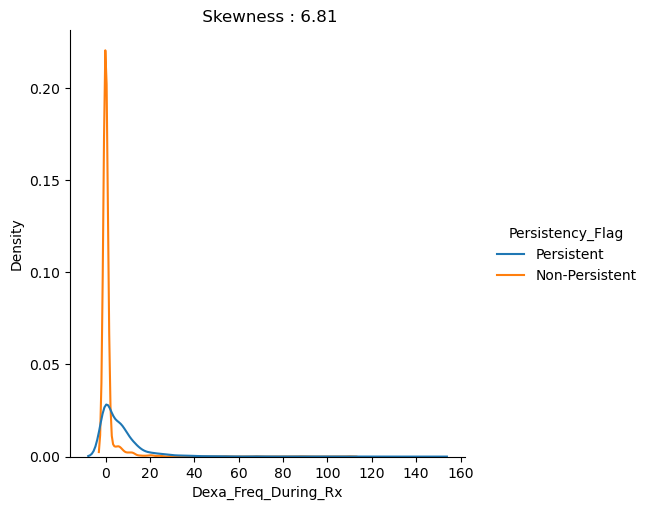

In [15]:
for i in num_cols:
    sns.displot(data = data, x=i, kind='kde', hue='Persistency_Flag')
    plt.title(f' Skewness : {round(data[i].skew(),2)}')
plt.show()

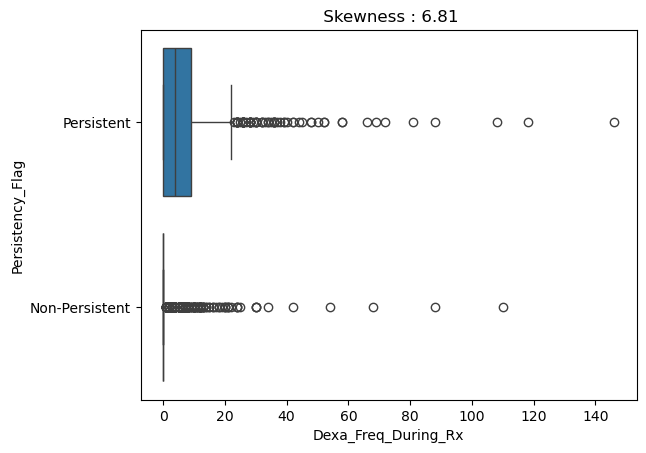

In [16]:
for i in num_cols:
    sns.boxplot(data = data, x=i, y='Persistency_Flag')
    plt.title(f' Skewness : {round(data[i].skew(),2)}')
plt.show()

**Inference**

* Both persistancy and non-persistancy shows extreme outliers in case of Dexa scan during Rx

* Very high positive skewness of Dexa scan in terms of persistency i.e., 6.81

**Cat vs cat**

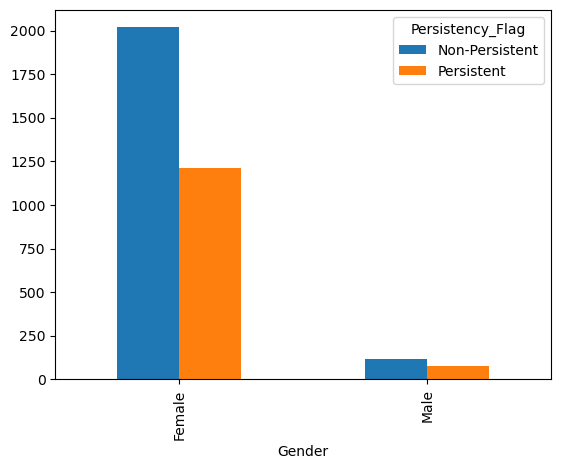

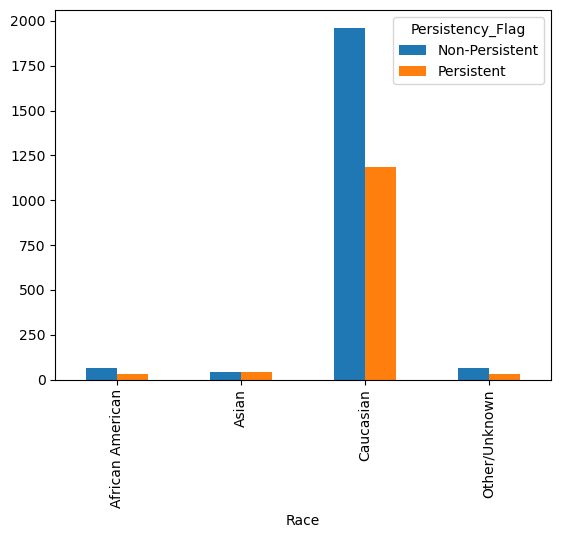

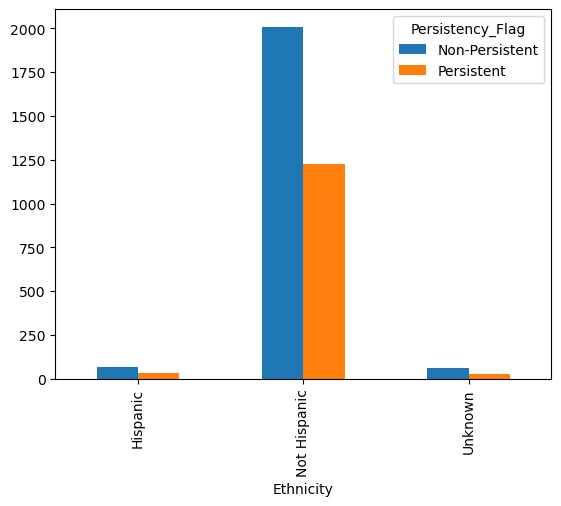

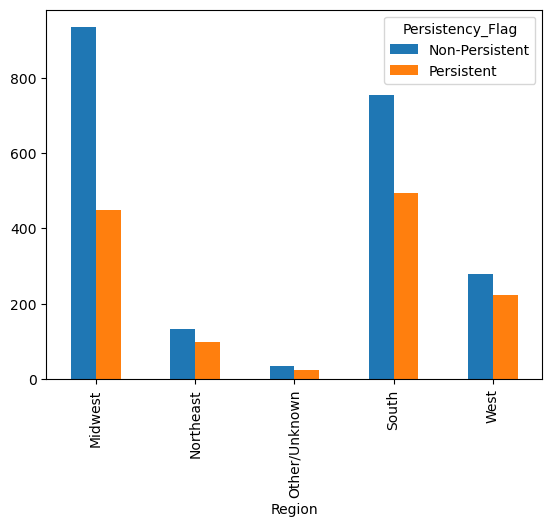

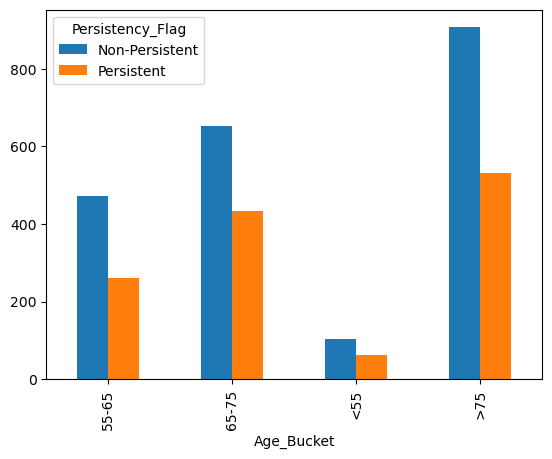

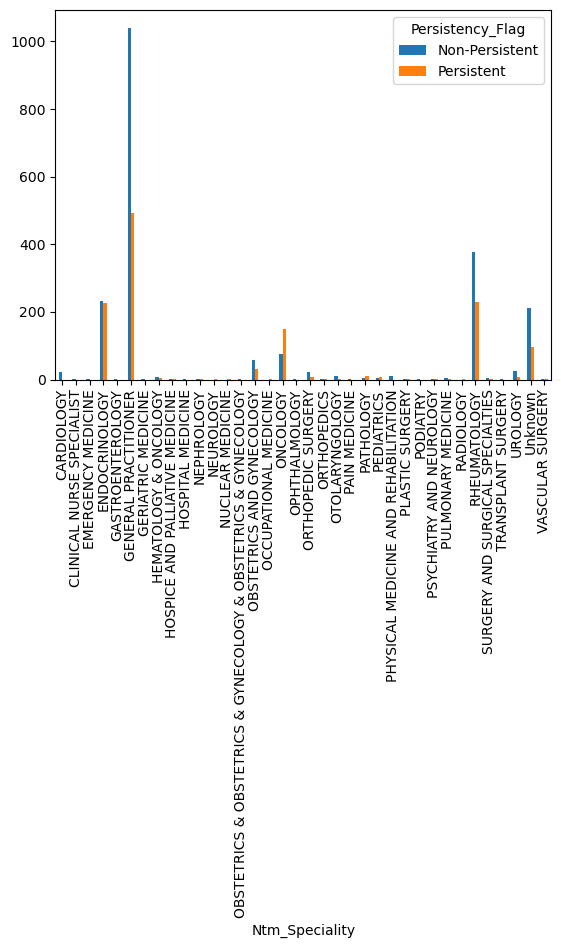

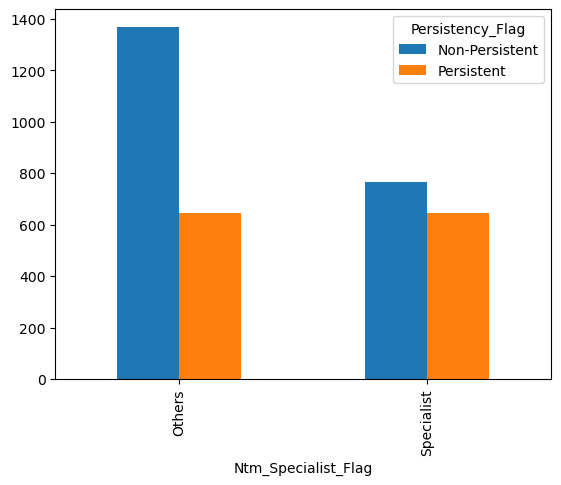

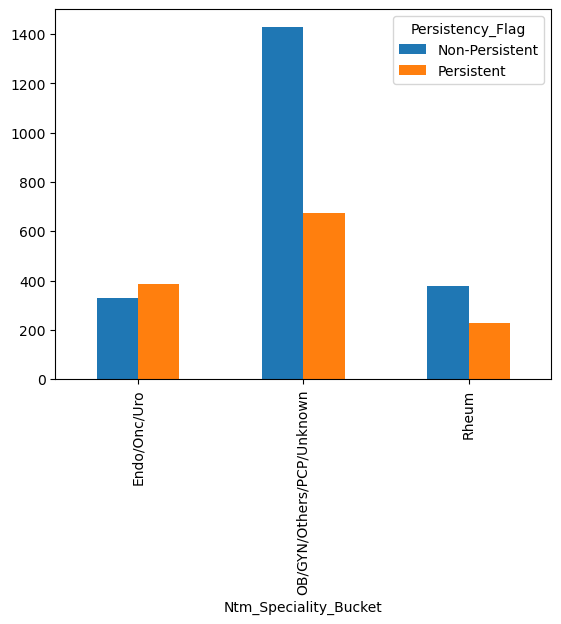

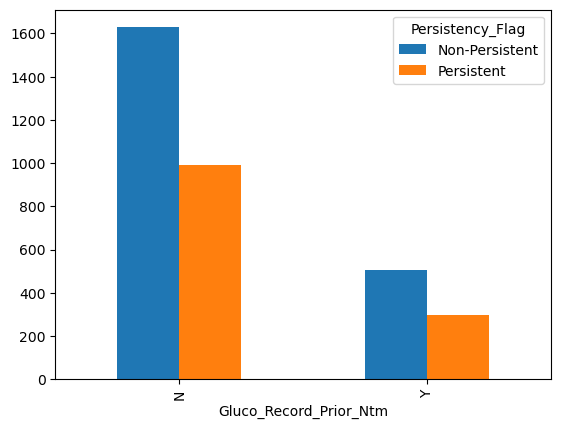

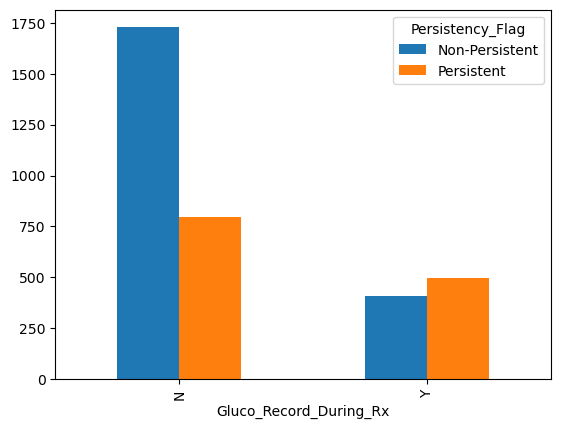

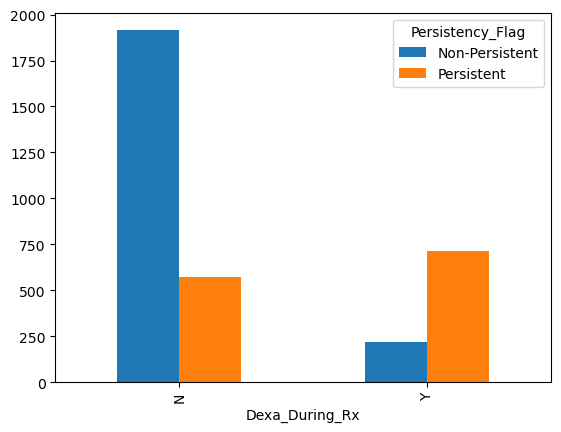

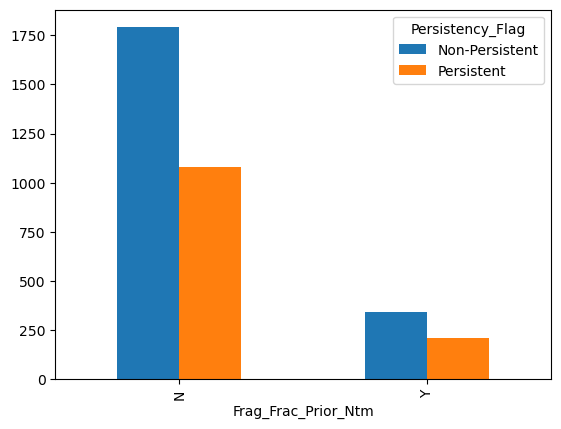

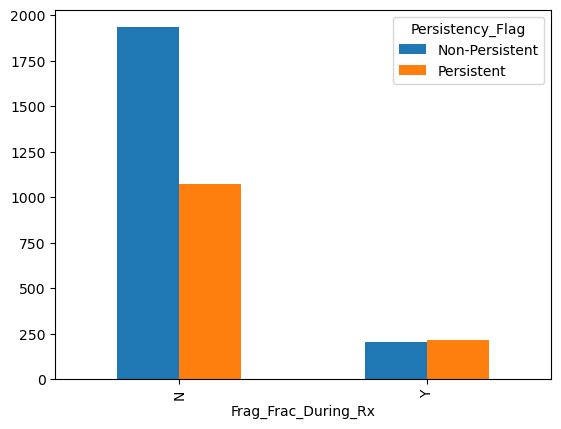

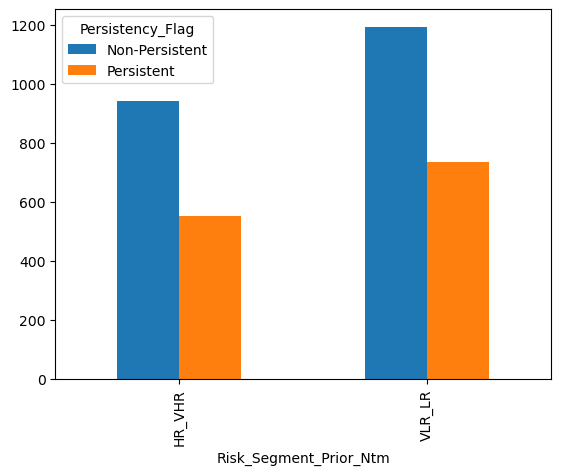

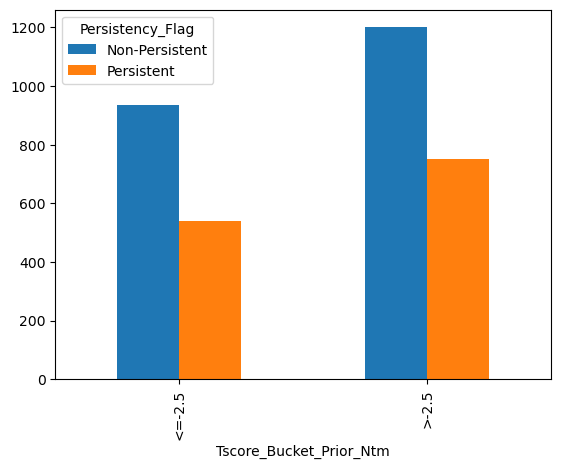

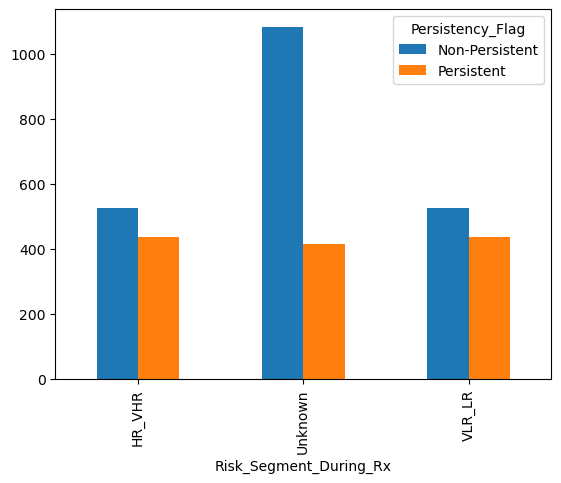

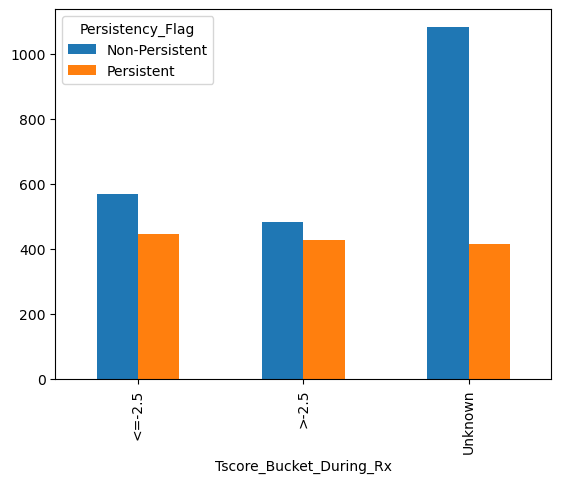

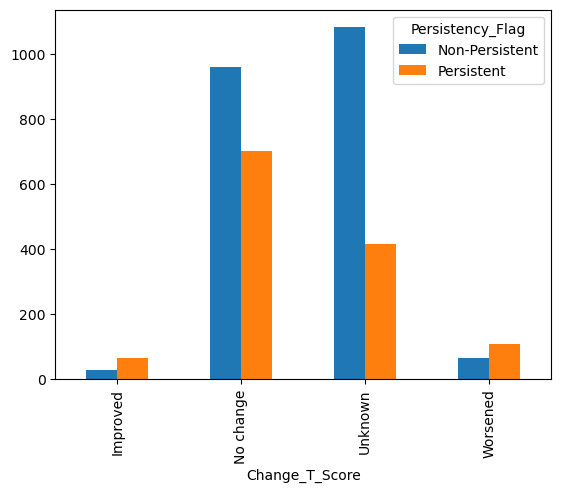

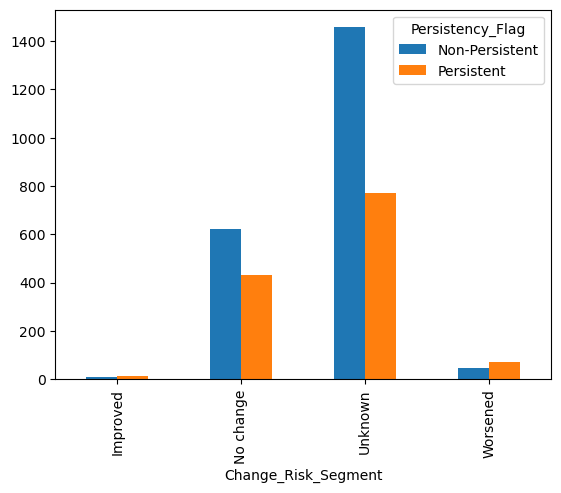

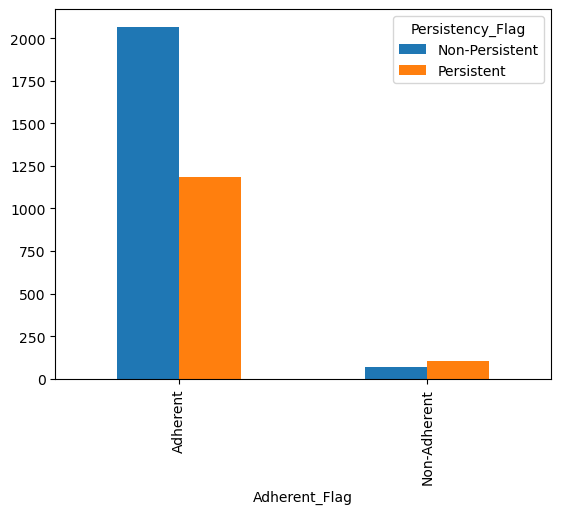

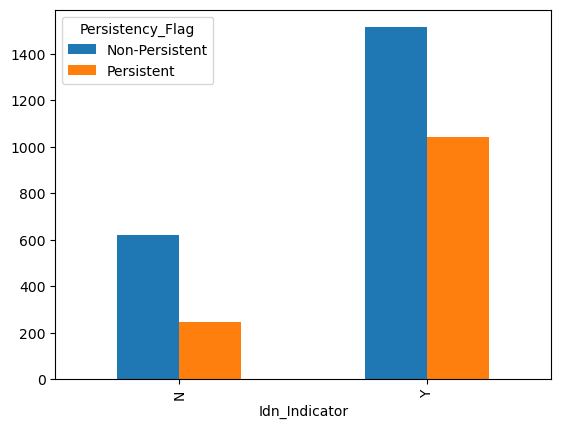

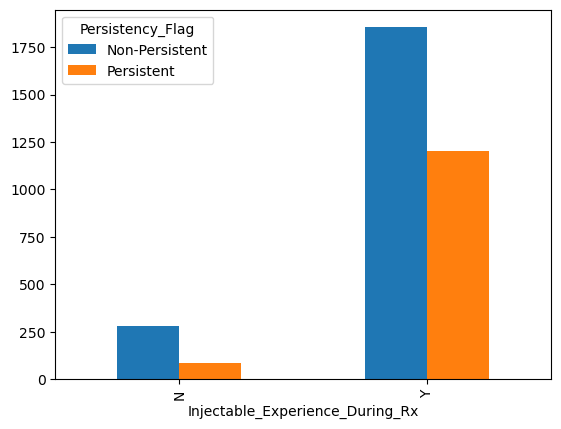

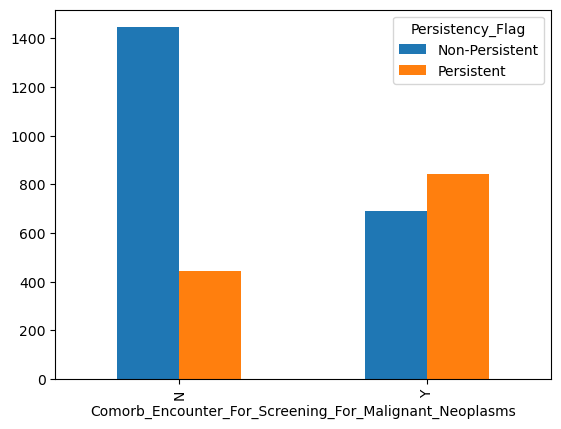

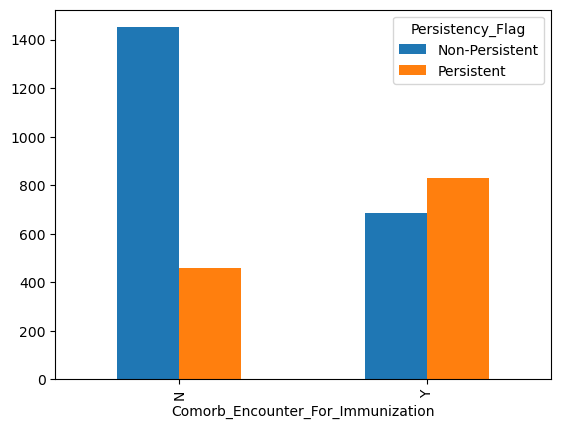

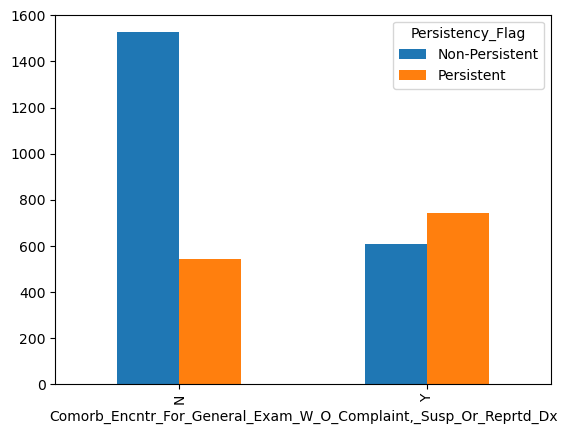

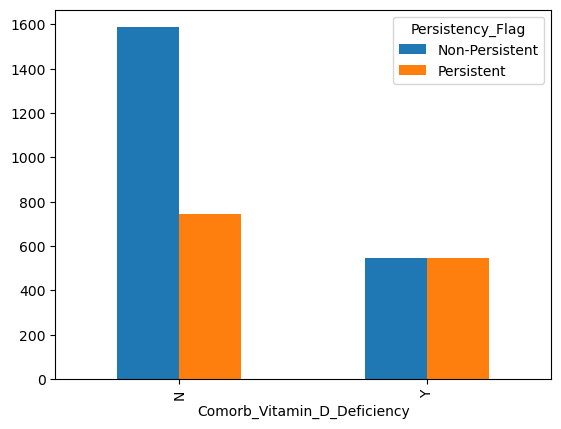

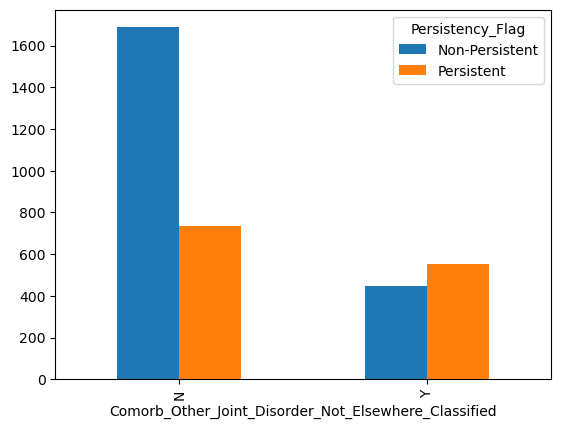

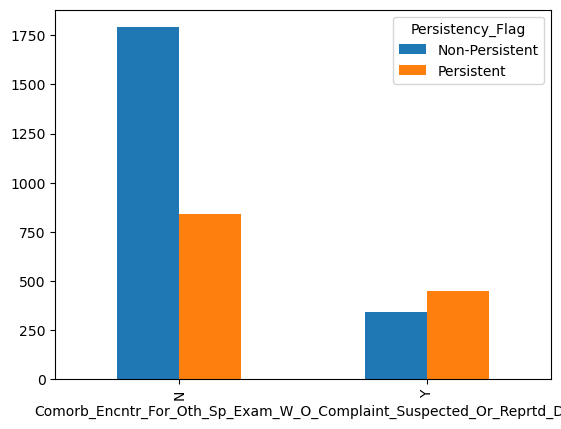

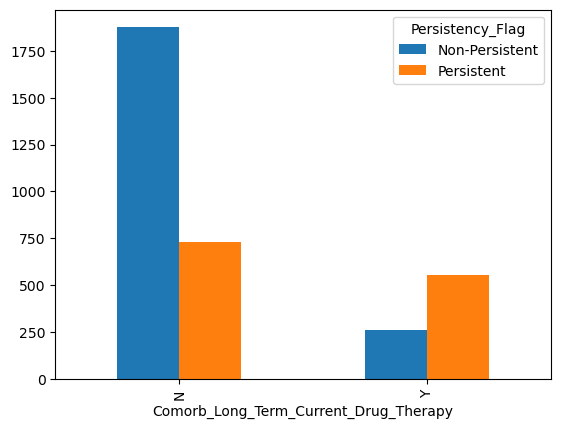

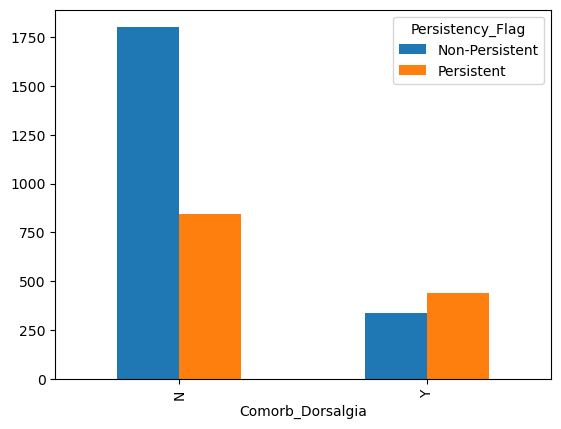

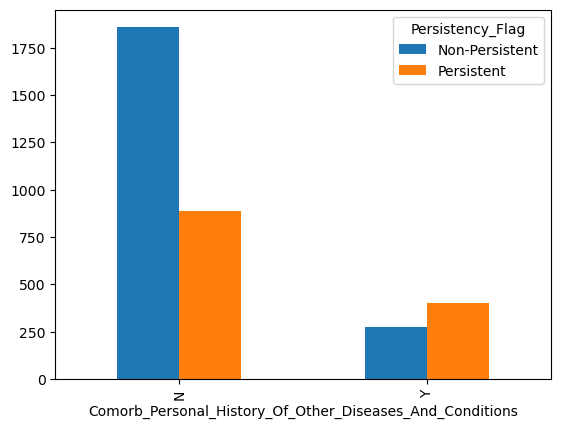

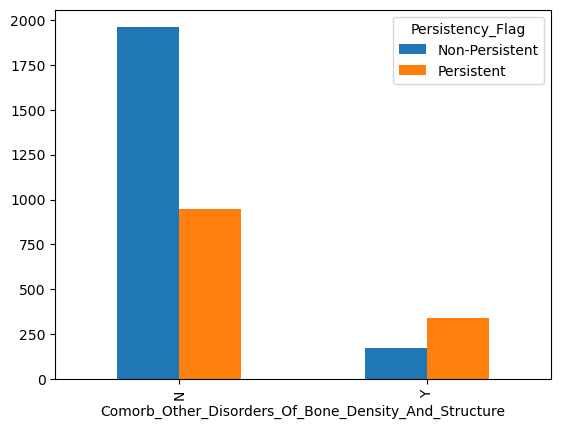

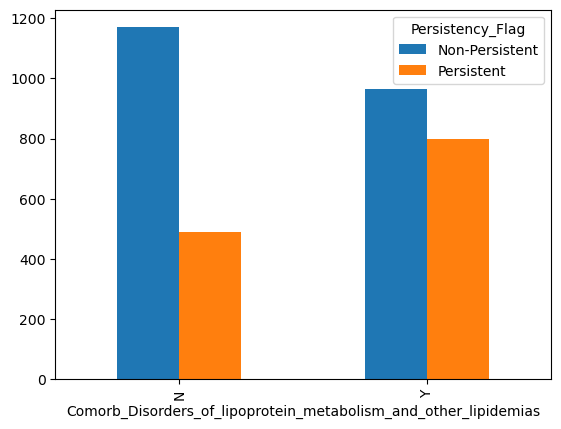

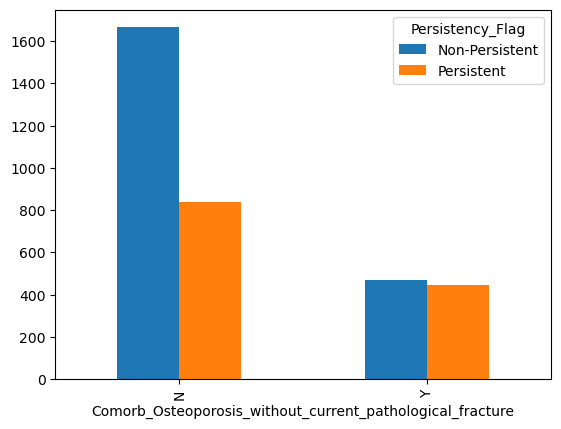

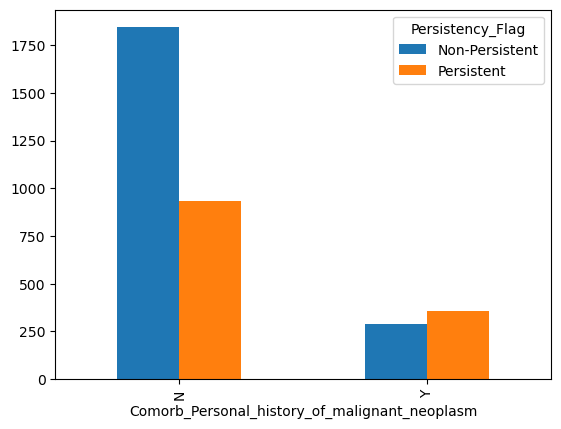

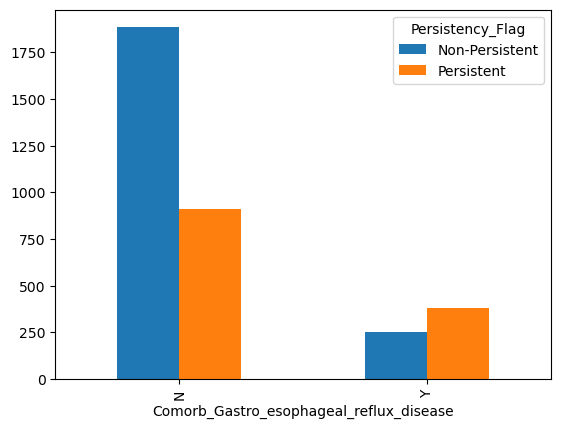

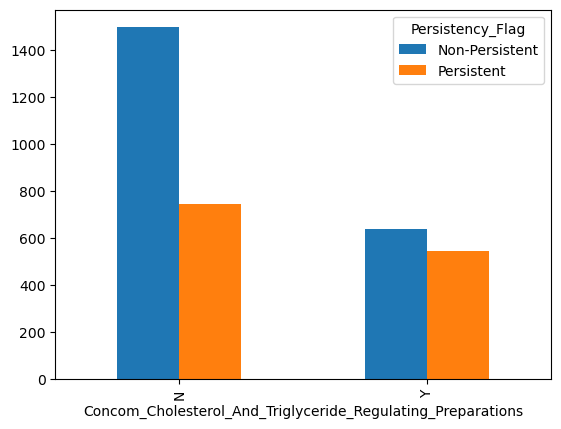

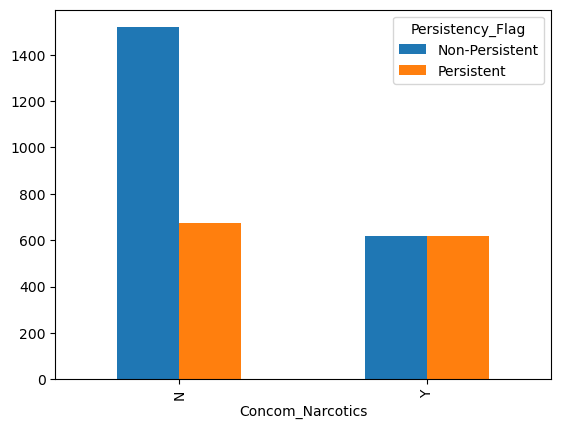

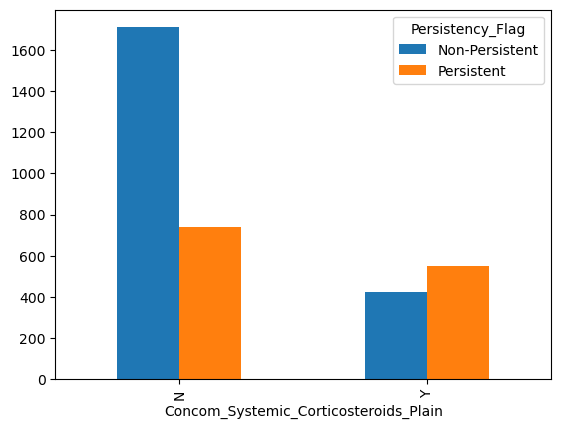

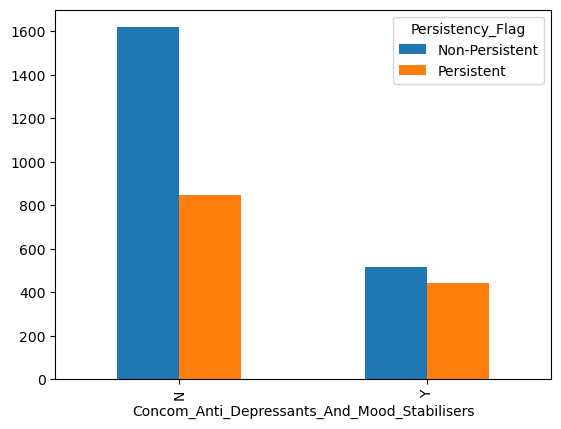

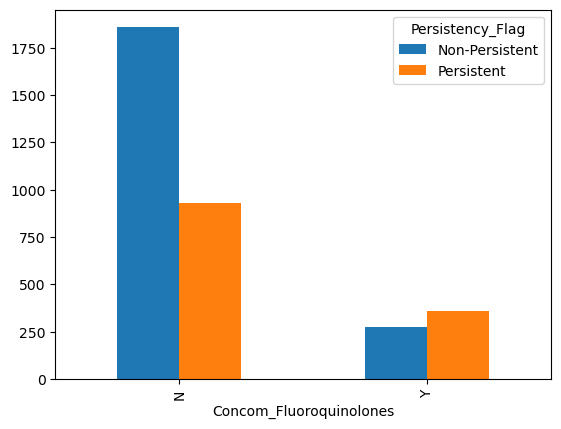

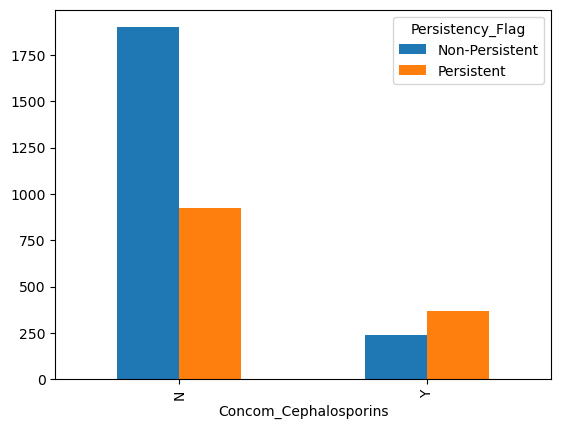

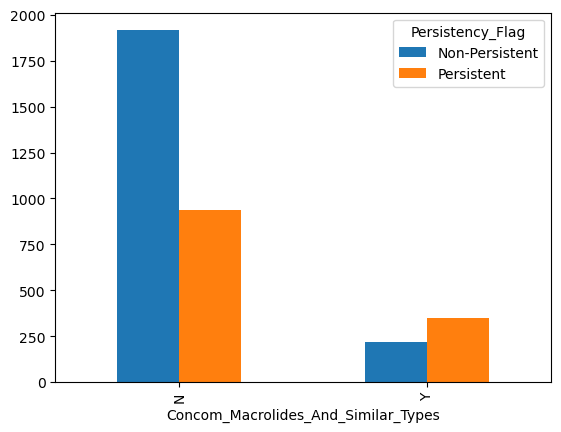

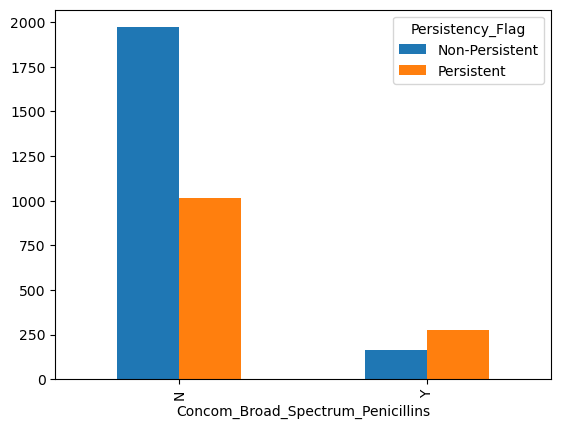

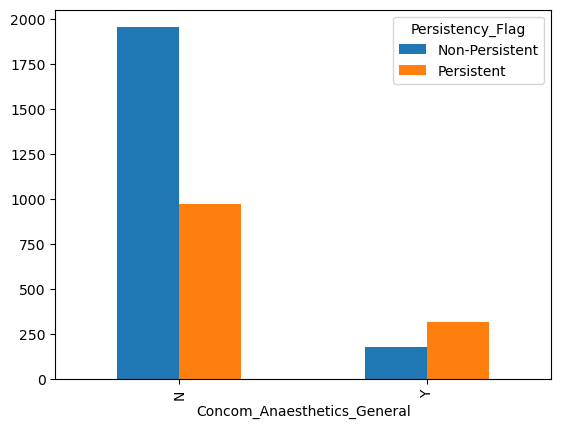

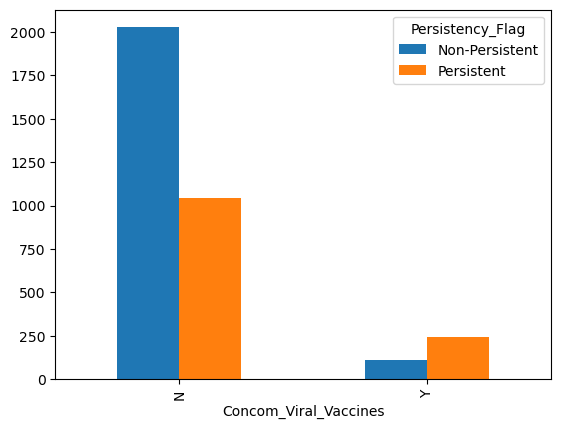

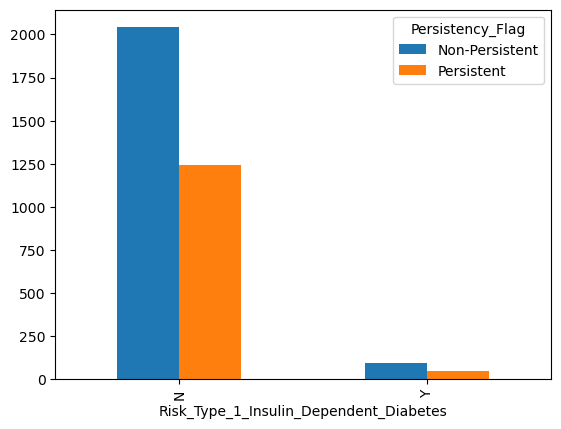

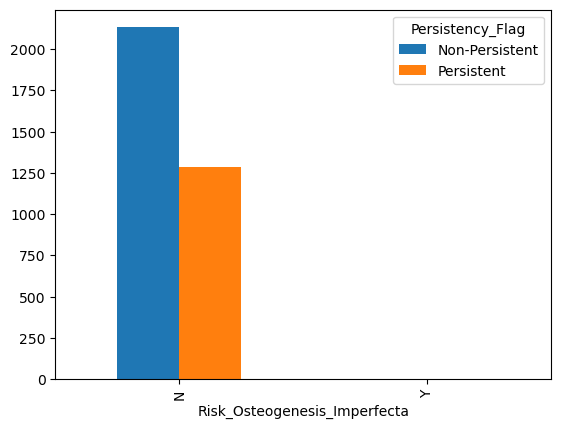

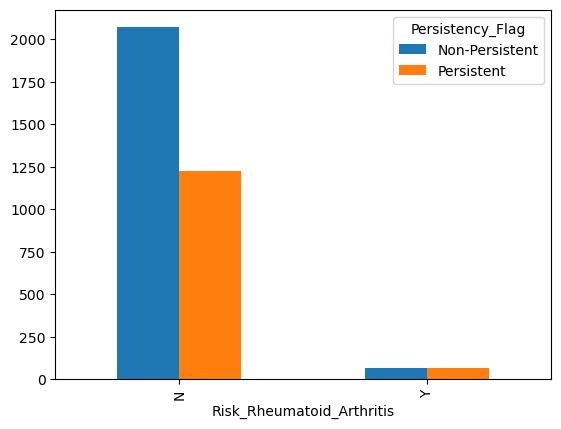

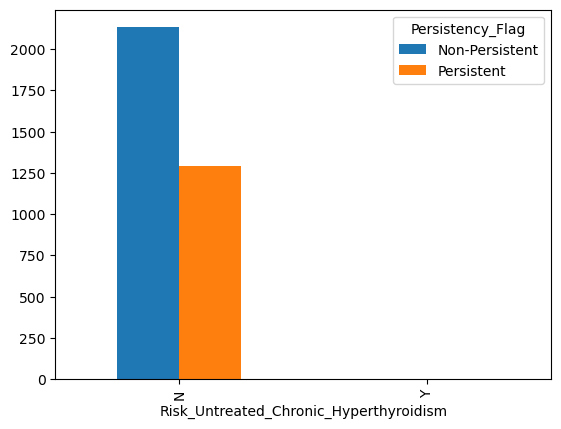

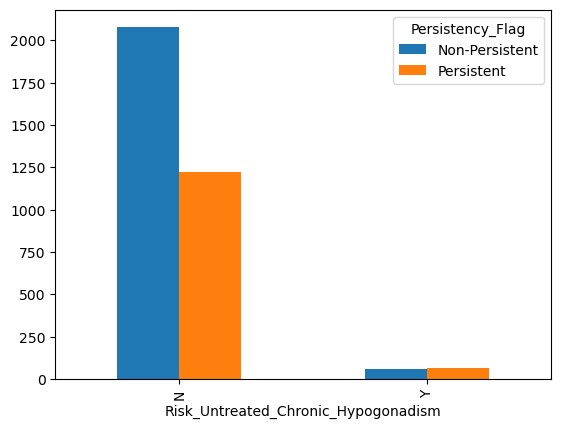

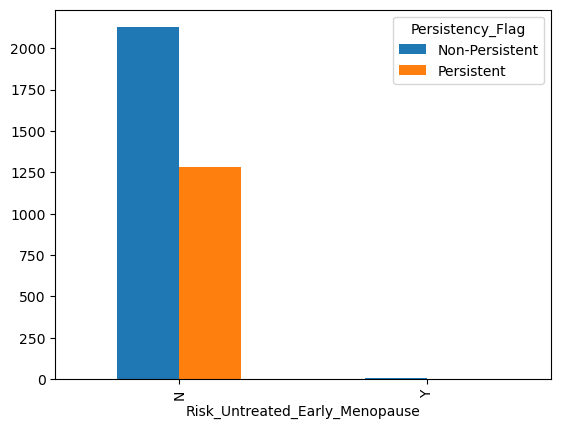

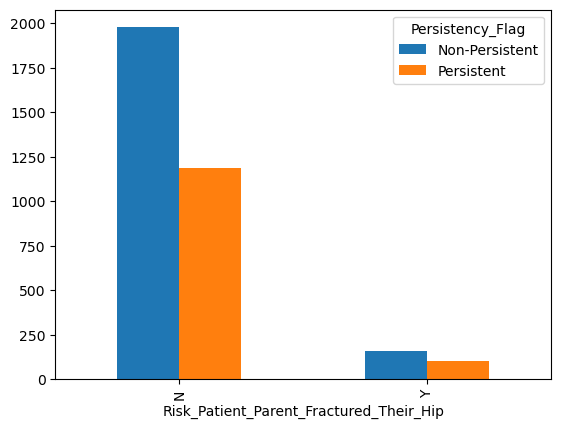

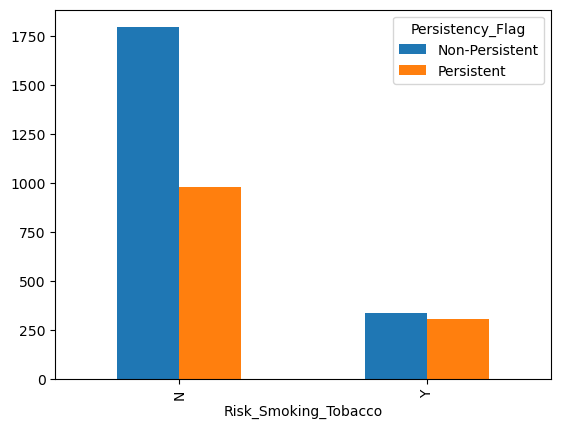

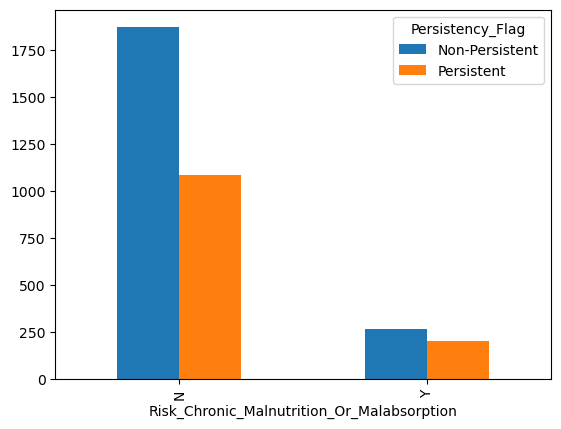

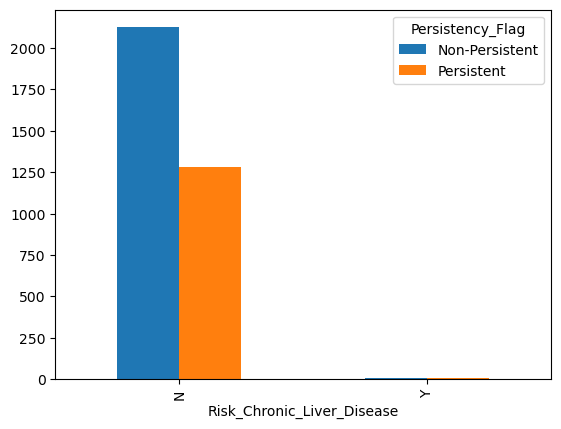

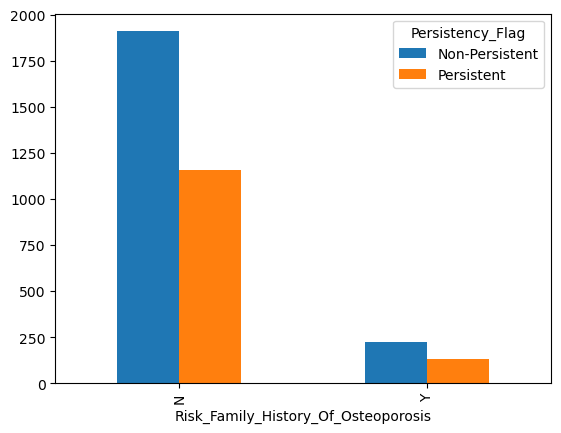

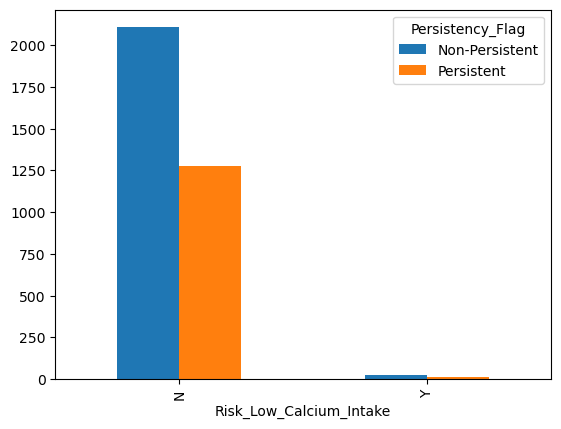

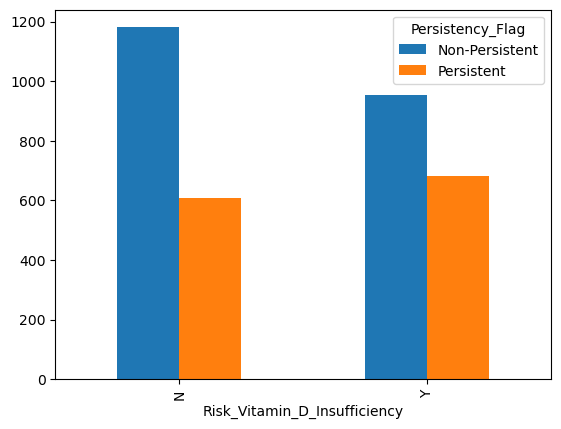

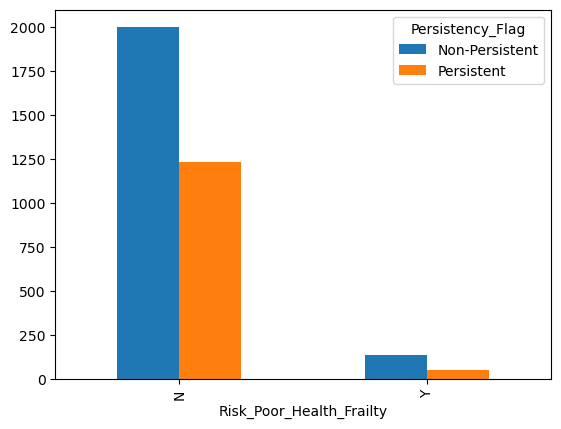

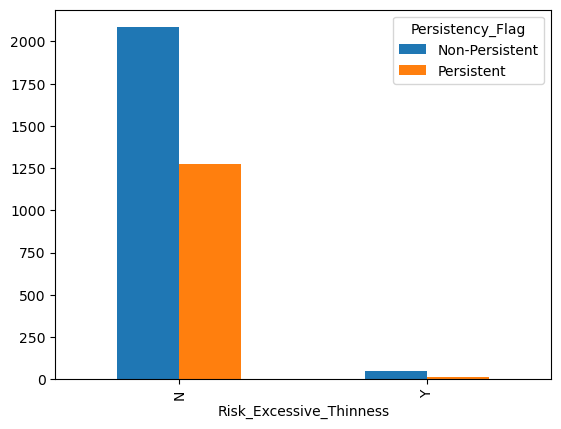

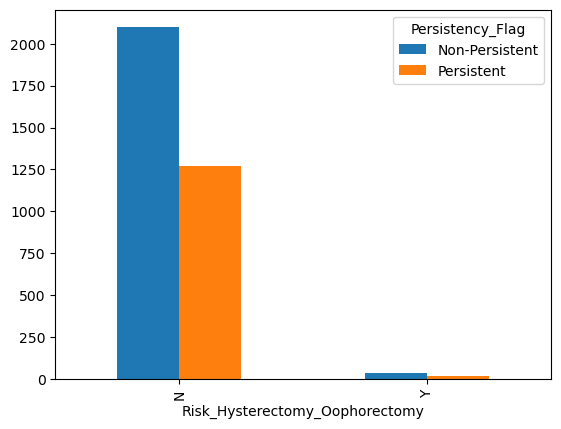

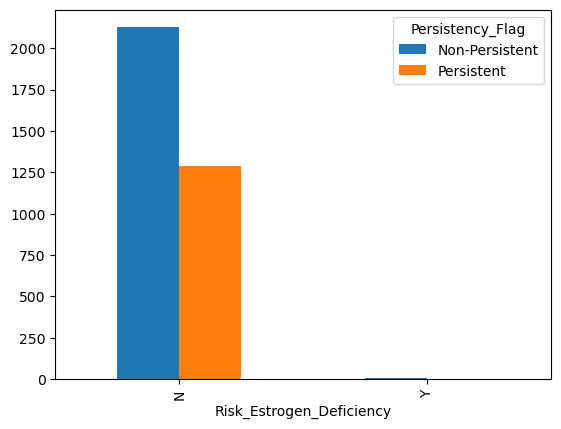

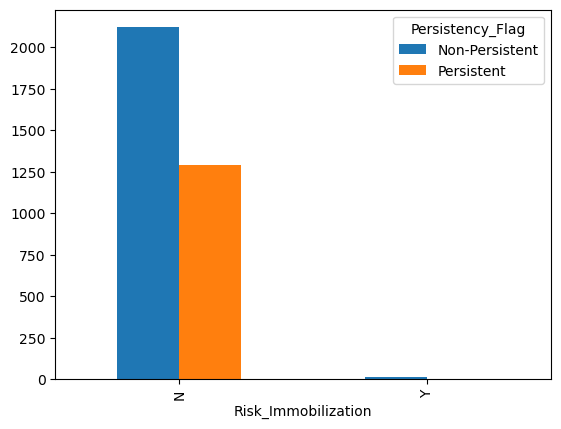

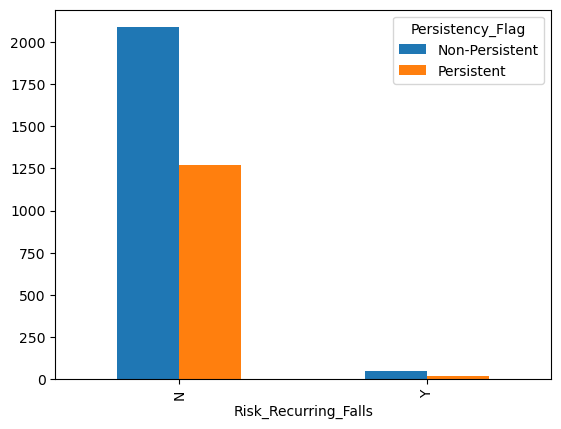

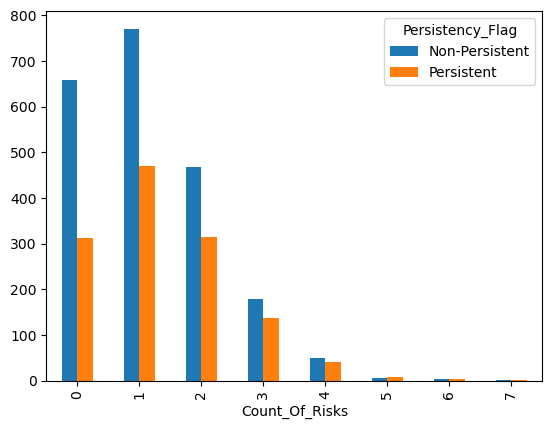

In [17]:
for i in cat_cols:
    if i != 'Persistency_Flag':
        pd.crosstab(index = data[i], columns = data['Persistency_Flag']).plot(kind='bar')
plt.show()        

**Inference**

* Mostly patients were female and they were not persistent while some were persistent as well and very less ratio of male patients although in males also most of them were not persistent

* Mostly patients belong to Caucasian race and among them most were not persistent and they belong to Non-Hispanic ethnicity 

* Most patients were from Midwest region followed by South region then West

* Mostly patients fall on the age group of more than 75 years

* Mostly Ntm Speciality bucket belongs to OB/GYN/Others/PCP/Unknown but more persistent cases were from Endo/Onc/Uro

* Mostly patients Glucocorticoid Record during Rx was 'NO' and they were non-persitent but those who fall in 'YES' category they were more persistent

* Mostly patients did not underwent Dexa scan during Rx and most of them were non-persistent but those who underwent Dexa scan most of them were persistent

* In most cases we saw that Change in T Score was 'Unknown' followed by 'No Change' followed by 'Worsened' and 'Improved' but in case of 'Worsened' and 'Improved' most of the patients were persistent

* Mostly Comorbidity Encounter for Screening for Malignant Neoplasms were 'No' and they were non persistent but those who fall in 'Yes' category they were more persistent, same for Comorbidity Encounter for Immunization and for Comorbidity Encounter for General Exam W_O Complaint, Susp or Reported Dx, same for Comorbidity Other Joint Disorder Not Elsewhere Classified and almost for all Comorbidity cases

* But overall we see that non persistency is more than persistency

## Statistical Analysis

### Inferential Statistics

In [18]:
# To test persistency with Dexa freq during Rx and it is more prone to be persistent
# mu1 = Avg dexa frequency during Rx for persistent patients is less than or equal to non-persistent patients
# mu2 = Avg dexa frequency during Rx for persistent patients is more than non-persistant patients

# Ho : mu1<=mu2
# Ha : mu1>mu2

samp1 = data[data['Persistency_Flag']=='Persistent']['Dexa_Freq_During_Rx']
samp2 = data[data['Persistency_Flag']=='Non-Persistent']['Dexa_Freq_During_Rx']

# Check for Assumptions

# Assumption 1 : Normality
print(stats.shapiro(data['Dexa_Freq_During_Rx']))

# Assumption 2 : Equal Variances
print(stats.levene(samp1, samp2))

ShapiroResult(statistic=0.401555597782135, pvalue=0.0)
LeveneResult(statistic=465.3017061761121, pvalue=7.239894192933334e-97)


**Generally as there is no value of alpha given here, so we consider it to be 0.05 and the data fails both the assumptions so we need to use non-parametric test (Mannwhitney U Test)**

In [19]:
tstat, p_value = stats.mannwhitneyu(samp1, samp2, alternative = 'greater')
print(tstat, p_value)

# With 95% confidence level, alpha = 0.05
if p_value<0.05:
    print('Reject Ho')
else:
    print('Fail to reject Ho')

2024137.0 4.722909991140032e-191
Reject Ho


**Inference**

* Hence, we can say that patient's who are persistent tend to have more dexa scans during Rx

## Data Preprocessing

### Check for Defects

**Check for Missing Values**

In [20]:
data.isnull().sum().sum()

0

**Inference**

* There are no null values in the dataset

**Check for Duplicate Records**

In [21]:
data[data.duplicated()]

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,,,,,,,,,,,,,,,,,,,,,
P104,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P144,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P1404,Non-Persistent,Female,Caucasian,Not Hispanic,South,<55,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P1892,Non-Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,2
P2686,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P2715,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


**Inference**

* There are no duplicate values in the dataset

**Outlier Detection**

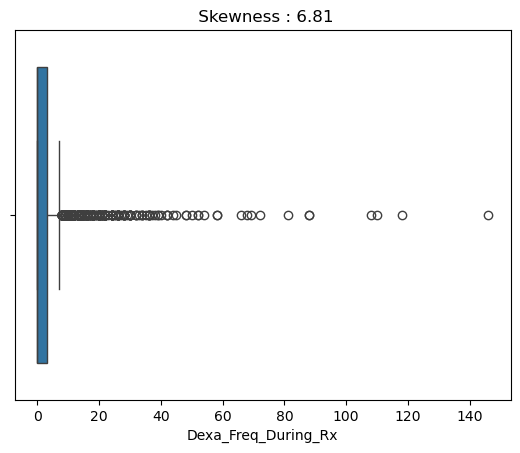

In [22]:
sns.boxplot(data['Dexa_Freq_During_Rx'], orient='h')
plt.title(f" Skewness : {round(data['Dexa_Freq_During_Rx'].skew(),2)}")
plt.show()

** Capping the extreme outliers

In [23]:
for i in num_cols:
    q3, q1 = np.percentile(data[i], [75, 25])
    iqr = q3-q1
    ul, ll = q3+1.5*iqr, q1-1.5*iqr
    data[i] = data[i].apply(lambda x : ul if x>ul else ll if x<ll else x)

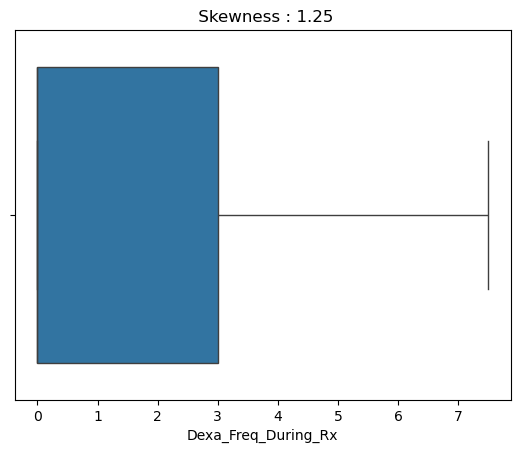

In [24]:
sns.boxplot(data['Dexa_Freq_During_Rx'], orient='h')
plt.title(f" Skewness : {round(data['Dexa_Freq_During_Rx'].skew(),2)}")
plt.show()

**Inference**

* After capping the outliers, skewness of Dexa Frequency During Rx has been reduced to 1.25 from 6.81

## Feature Engineering

In [25]:
data = data.drop(columns=['Ntm_Speciality', 'Ntm_Specialist_Flag'])
data.head(3)

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,OB/GYN/Others/PCP/Unknown,N,N,0.0,...,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,OB/GYN/Others/PCP/Unknown,N,N,0.0,...,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,OB/GYN/Others/PCP/Unknown,N,N,0.0,...,N,Y,N,N,N,N,N,N,N,2


## Encoding

In [28]:
data['Persistency_Flag'] = data['Persistency_Flag'].map({'Persitent':1, 'Non-Persistent':0})
data = pd.get_dummies(data, columns=['Gender'], dtype=int, drop_first = True)
data = pd.get_dummies(data, columns=['Race'], dtype=int, drop_first=True)
data = pd.get_dummies(data, columns=['Ethnicity'], dtype=int, drop_first=True)
data = pd.get_dummies(data, columns=['Region'], dtype=int, drop_first=True)
data['Age_Bucket'] = data['Age_Bucket'].map({'<55':1, '55-65':2, '65-75':3, '>75':4})
data = pd.get_dummies(data, columns=['Ntm_Speciality_Bucket'], dtype=int, drop_first=True)
data['Gluco_Record_Prior_Ntm'] = data['Gluco_Record_Prior_Ntm'].map({'Y':1, 'N':0})
data['Gluco_Record_During_Rx'] = data['Gluco_Record_During_Rx'].map({'Y':1, 'N':0})
data['Dexa_During_Rx'] = data['Dexa_During_Rx'].map({'Y':1, 'N':0})
data['Frag_Frac_Prior_Ntm'] = data['Frag_Frac_Prior_Ntm'].map({'Y':1, 'N':0})
data['Frag_Frac_During_Rx'] = data['Frag_Frac_During_Rx'].map({'Y':1, 'N':0})
data = pd.get_dummies(data, columns=['Risk_Segment_Prior_Ntm'], dtype=int, drop_first=True)
data['Tscore_Bucket_Prior_Ntm'] = data['Tscore_Bucket_Prior_Ntm'].map({'>-2.5':1, '<=-2.5':0})
data = pd.get_dummies(data, columns=['Risk_Segment_During_Rx'], dtype=int, drop_first=True)
data['Tscore_Bucket_During_Rx'] = data['Tscore_Bucket_During_Rx'].map({'<=-2.5':0, '>-2.5':1})
data = pd.get_dummies(data, columns=['Change_T_Score'], dtype=int, drop_first=True)
data = pd.get_dummies(data, columns=['Change_Risk_Segment'], dtype=int, drop_first=True)
data['Adherent_Flag'] = data['Adherent_Flag'].map({'Adherent':1, 'Non-Adherent':0})
data['Idn_Indicator'] = data['Idn_Indicator'].map({'Y':1, 'N':0})
data['Injectable_Experience_During_Rx'] = data['Injectable_Experience_During_Rx'].map({'Y':1, 'N':0})
data['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'] = data['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'].map({'Y':1, 'N':0})
data['Comorb_Encounter_For_Immunization'] = data['Comorb_Encounter_For_Immunization'].map({'Y':1, 'N':0})
data['Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx'] = data['Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx'].map({'Y':1, 'N':0})
data['Comorb_Vitamin_D_Deficiency'] = data['Comorb_Vitamin_D_Deficiency'].map({'Y':1, 'N':0})
data['Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'] = data['Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'].map({'Y':1, 'N':0})
data['Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'] = data['Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'].map({'Y':1, 'N':0})
data['Comorb_Long_Term_Current_Drug_Therapy'] = data['Comorb_Long_Term_Current_Drug_Therapy'].map({'Y':1, 'N':0})
data['Comorb_Dorsalgia'] = data['Comorb_Dorsalgia'].map({'Y':1, 'N':0})
data['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'] = data['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'].map({'Y':1, 'N':0})
data['Comorb_Other_Disorders_Of_Bone_Density_And_Structure'] = data['Comorb_Other_Disorders_Of_Bone_Density_And_Structure'].map({'Y':1, 'N':0})
data['Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'] = data['Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'].map({'Y':1, 'N':0})
data['Comorb_Osteoporosis_without_current_pathological_fracture'] = data['Comorb_Osteoporosis_without_current_pathological_fracture'].map({'Y':1, 'N':0})
data['Comorb_Personal_history_of_malignant_neoplasm'] = data['Comorb_Personal_history_of_malignant_neoplasm'].map({'Y':1, 'N':0})
data['Comorb_Gastro_esophageal_reflux_disease'] = data['Comorb_Gastro_esophageal_reflux_disease'].map({'Y':1, 'N':0})
data['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'] = data['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'].map({'Y':1, 'N':0})
data['Concom_Narcotics'] = data['Concom_Narcotics'].map({'Y':1, 'N':0})
data['Concom_Systemic_Corticosteroids_Plain'] = data['Concom_Systemic_Corticosteroids_Plain'].map({'Y':1, 'N':0})
data['Concom_Anti_Depressants_And_Mood_Stabilisers'] = data['Concom_Anti_Depressants_And_Mood_Stabilisers'].map({'Y':1, 'N':0})
data['Concom_Fluoroquinolones'] = data['Concom_Fluoroquinolones'].map({'Y':1, 'N':0})
data['Concom_Cephalosporins'] = data['Concom_Cephalosporins'].map({'Y':1, 'N':0})
data['Concom_Macrolides_And_Similar_Types'] = data['Concom_Macrolides_And_Similar_Types'].map({'Y':1, 'N':0})
data['Concom_Broad_Spectrum_Penicillins'] = data['Concom_Broad_Spectrum_Penicillins'].map({'Y':1, 'N':0})
data['Concom_Anaesthetics_General'] = data['Concom_Anaesthetics_General'].map({'Y':1, 'N':0})
data['Concom_Viral_Vaccines'] = data['Concom_Viral_Vaccines'].map({'Y':1, 'N':0})
data['Risk_Type_1_Insulin_Dependent_Diabetes'] = data['Risk_Type_1_Insulin_Dependent_Diabetes'].map({'Y':1, 'N':0})
data['Risk_Osteogenesis_Imperfecta'] = data['Risk_Osteogenesis_Imperfecta'].map({'Y':1, 'N':0})
data['Risk_Rheumatoid_Arthritis'] = data['Risk_Rheumatoid_Arthritis'].map({'Y':1, 'N':0})
data['Risk_Untreated_Chronic_Hyperthyroidism'] = data['Risk_Untreated_Chronic_Hyperthyroidism'].map({'Y':1, 'N':0})
data['Risk_Untreated_Chronic_Hypogonadism'] = data['Risk_Untreated_Chronic_Hypogonadism'].map({'Y':1, 'N':0})
data['Risk_Untreated_Early_Menopause'] = data['Risk_Untreated_Early_Menopause'].map({'Y':1, 'N':0})
data['Risk_Patient_Parent_Fractured_Their_Hip'] = data['Risk_Patient_Parent_Fractured_Their_Hip'].map({'Y':1, 'N':0})
data['Risk_Smoking_Tobacco'] = data['Risk_Smoking_Tobacco'].map({'Y':1, 'N':0})
data['Risk_Chronic_Malnutrition_Or_Malabsorption'] = data['Risk_Chronic_Malnutrition_Or_Malabsorption'].map({'Y':1, 'N':0})
data['Risk_Chronic_Liver_Disease'] = data['Risk_Chronic_Liver_Disease'].map({'Y':1, 'N':0})
data['Risk_Family_History_Of_Osteoporosis'] = data['Risk_Family_History_Of_Osteoporosis'].map({'Y':1, 'N':0})
data['Risk_Low_Calcium_Intake'] = data['Risk_Low_Calcium_Intake'].map({'Y':1, 'N':0})
data['Risk_Vitamin_D_Insufficiency'] = data['Risk_Vitamin_D_Insufficiency'].map({'Y':1, 'N':0})
data['Risk_Poor_Health_Frailty'] = data['Risk_Poor_Health_Frailty'].map({'Y':1, 'N':0})
data['Risk_Excessive_Thinness'] = data['Risk_Excessive_Thinness'].map({'Y':1, 'N':0})
data['Risk_Hysterectomy_Oophorectomy'] = data['Risk_Hysterectomy_Oophorectomy'].map({'Y':1, 'N':0})
data['Risk_Estrogen_Deficiency'] = data['Risk_Estrogen_Deficiency'].map({'Y':1, 'N':0})
data['Risk_Immobilization'] = data['Risk_Immobilization'].map({'Y':1, 'N':0})
data['Risk_Recurring_Falls'] = data['Risk_Recurring_Falls'].map({'Y':1, 'N':0})
data['Count_Of_Risks'] = data['Count_Of_Risks'].map({'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7})     

## Feature Transformation

**Log 1p Transformation**

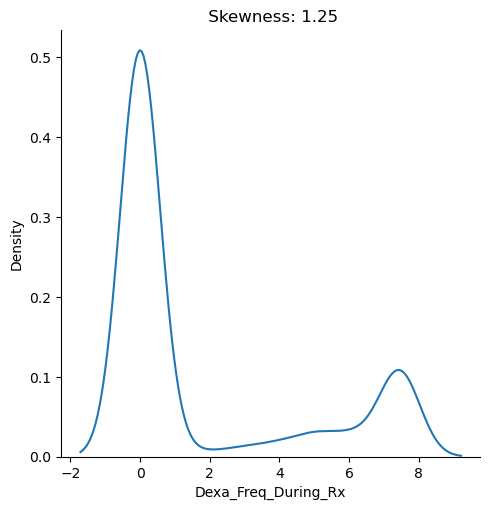

In [32]:
sns.displot(data['Dexa_Freq_During_Rx'], kind='kde')
plt.title(f" Skewness: {round(data['Dexa_Freq_During_Rx'].skew(),2)}")
plt.show()

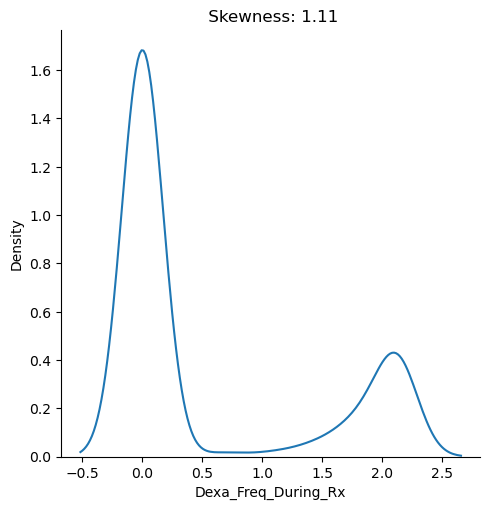

In [33]:
log_1p = np.log(data['Dexa_Freq_During_Rx']+1)
sns.displot(log_1p, kind='kde')
plt.title(f' Skewness: {round(log_1p.skew(),2)}')
plt.show()